## Project II - Regression Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'reg', 'low fat'],['LF', 'REG', 'REG', 'LF'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace = True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace = True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   object  
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   object  
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Establishment_Year  8523 non-null   category
 6   Outlet_Size                8523 non-null   object  
 7   Outlet_Location_Type       8523 non-null   object  
 8   Outlet_Type                8523 non-null   object  
 9   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(1), float64(4), object(5)
memory usage: 608.1+ KB


In [8]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [11]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

In [12]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## 43

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 44

In [17]:
print(lm.intercept_)
print(lm.coef_)

[0.00989849]
[[-4.55094512e-03 -1.44046269e-02  5.72488255e-01  1.29615284e-02
  -2.56714055e-03  5.14359194e-03  3.48110200e-03 -1.48683057e-02
  -1.76508464e-03  9.67833968e-03  1.08313131e-03  1.96228234e-03
  -2.46997131e-03 -6.62860227e-04 -4.83482129e-03  1.18765526e-02
  -2.10827767e-03 -4.71524130e-03  1.91767068e-03  5.33906206e+11
   2.43342707e+12 -1.47207217e+12  1.10529882e+12  1.12834953e+12
   2.45701058e+12  1.12674867e+12 -1.06889538e+12 -6.23095428e+10
  -1.97038877e+12 -3.54774981e+10  8.33495708e+11 -3.71181955e+12
  -7.89532984e+11 -1.86456452e+12]]


## 45

In [18]:
predicted = sc_y.inverse_transform(lm.predict(X_test))
predicted

array([[1375.80844455],
       [ 722.57738544],
       [ 889.21796174],
       ...,
       [ 860.05586089],
       [ 578.43328693],
       [1729.50306776]])

In [19]:
y_real = sc_y.inverse_transform(y_test)
y_real

array([[1743.0644],
       [ 356.8688],
       [ 377.5086],
       ...,
       [ 629.181 ],
       [ 253.004 ],
       [ 976.7286]])

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_real, predicted))
print('MSE:', metrics.mean_squared_error(y_real, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2:', metrics.r2_score(y_real, predicted))

MAE: 793.7982293735779
MSE: 1144891.46063839
RMSE: 1069.9960096366667
R2: 0.5787696580251418


## 46

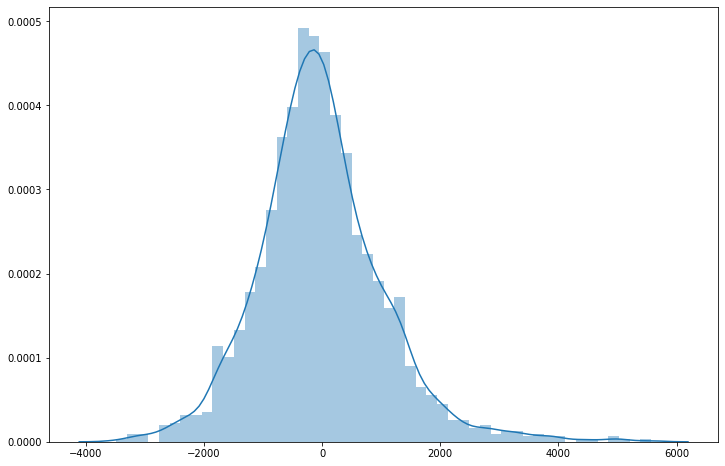

In [25]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_real-predicted), bins=50)

## 47

In [26]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,1743.0644,1375.808445
1,356.8688,722.577385
2,377.5086,889.217962
3,5778.4782,4245.359169
4,2356.9320,3348.832868
...,...,...
1700,3004.0896,2052.369184
1701,890.8404,2184.848443
1702,629.1810,860.055861
1703,253.0040,578.433287


In [27]:
print(df_predicted.to_string())

           Sales    Predicted
0      1743.0644  1375.808445
1       356.8688   722.577385
2       377.5086   889.217962
3      5778.4782  4245.359169
4      2356.9320  3348.832868
5       865.5400   642.589909
6      4613.9940  4771.110187
7      2410.8618  2063.200822
8      1948.1308  1404.970545
9      1937.4780  2801.418575
10      210.3928  -238.522138
11      255.0014  2134.856270
12     4541.4218  3921.868150
13      657.8104   978.370670
14      578.5802   765.903935
15     4229.1616  4353.675543
16     1267.0174  1812.198454
17     2388.8904  1830.737218
18     1797.6600  1982.380142
19     4447.5440  3262.179768
20     2570.6538  3121.993383
21     1779.6834  2721.431098
22     4211.1850  2877.864939
23     3912.2408  2522.295610
24     2366.9190  4220.987984
25     1298.3100  2276.500759
26      149.8050   725.076994
27     3916.2356  3810.427264
28     2065.3116  3176.151571
29     3029.3900  3910.411610
30      788.3072   834.226572
31     2566.6590  2772.256474
32      57

## 48

In [28]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.761249
Predicted,0.761249,1.000000
